# Data preprocessing

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

/Users/bricerandolph/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# now in sklearn.model_selection
from sklearn.cross_validation import train_test_split

from sklearn import datasets
import numpy as np

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print('Class labels:', np.unique(y))

('Class labels:', array([0, 1, 2]))


In [ ]:
#iris.items()

In [5]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

In [6]:
print('Label counts in y:', np.bincount(y))
print('Label counts in y train:', np.bincount(y_train))
print('Label counts in y test:', np.bincount(y_test))


('Label counts in y:', array([50, 50, 50]))
('Label counts in y train:', array([35, 35, 35]))
('Label counts in y test:', array([15, 15, 15]))


In [7]:
#loaded StandardScalar class from preprocessing module and initialized new SS object
# use fit method to calculate sample means and std for scaling
# use transform to center and scale
#NOTE: used the same scaling parameters to standardize the test set as the training set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#One vs Rest method allows support of multiclass classification

# Scikit-learn Perceptron

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=1, shuffle=True,
      verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
#misclassification error appx 6.7%
# or classification ACCURACY = 1 - error = 93.3% 

Misclassified samples: 3


In [13]:
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [15]:
#alternatively
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score( y_test,y_pred))

Accuracy: 0.93


In [16]:
import PlotDecisionRegions 

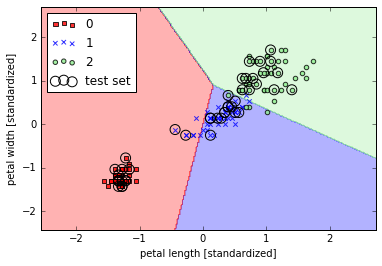

In [18]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
PlotDecisionRegions.plot_decision_regions(X=X_combined_std, y=y_combined, classifier = ppn, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')